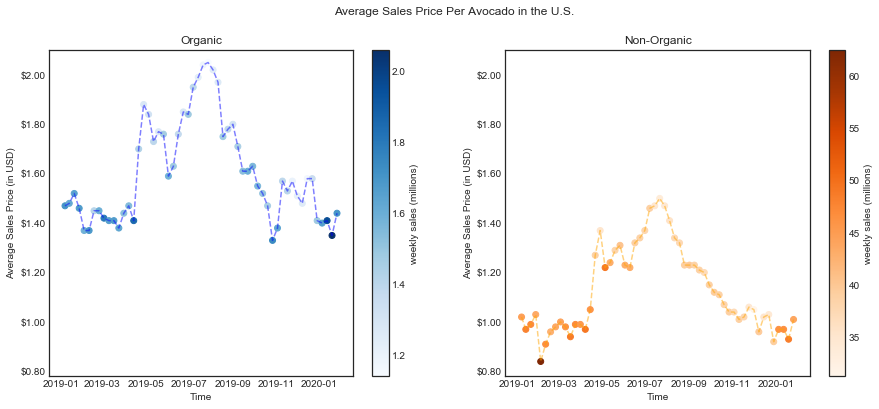

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

data = pd.read_csv("Avocado.csv", converters={'Type': str.rstrip})
    #import the data. 
    #The "converters" argument is because some "Type" values have whitespace at the end, which needs to be removed
us = data[data.Geography=="Total U.S."]
    #subset the data into observations for the entire U.S. rather than one particular region
us = us.assign(Date = pd.to_datetime(us["Current Year Week Ending"].values))
    #create a new column called "Date" populated with date objects so we can sort the observations by time
us = us.drop(labels=["Current Year Week Ending","Timeframe","Geography"], axis = "columns")
    #drop unnecessary columns
us = us.sort_values(["Date","Type"])
    #sort data frame by time
us.index = range(us.shape[0])
    #reset the index to 0,1,2,...

conv = us[us.Type=="Conventional"] #data frame of only non-organic avocados
org = us[us.Type=="Organic"] #data frame of only organic avocados

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(org.Date,org["ASP Current Year"],"--",c="blue",alpha=.5)
ax2.plot(conv.Date,conv["ASP Current Year"],"--",c="orange",alpha=.5)
    #plot the curves for average sales price of organic and non-organic avocados seperately
fig.suptitle("Average Sales Price Per Avocado in the U.S.") 
    #add the main title
ax1.set_title("Organic")
ax2.set_title("Non-Organic")
    #add the sub-titles
ax1.set_ylim(.78,2.1)
ax2.set_ylim(.78,2.1)
    #make the y limits the same
ax1.set_xlabel("Time")
ax2.set_xlabel("Time") 
    #add the x-axis labels
ax1.set_ylabel("Average Sales Price (in USD)") 
ax2.set_ylabel("Average Sales Price (in USD)") 
    #add the y-axis labels
ax1.set_yticks(np.linspace(.8,2,7))
ax1.set_yticklabels(["$0.80","$1.00","$1.20","$1.40","$1.60","$1.80","$2.00"])
ax2.set_yticks(np.linspace(.8,2,7))
ax2.set_yticklabels(["$0.80","$1.00","$1.20","$1.40","$1.60","$1.80","$2.00"])
    #make the y-axis ticks pretty
p1 = ax1.scatter(org.Date,org["ASP Current Year"],c=org["Total Bulk and Bags Units"]/1000000,cmap="Blues")
    #plot the dots for organic avocados average sales price. Darkness of the dots are sales volume.
p2 = ax2.scatter(conv.Date,conv["ASP Current Year"],c=conv["Total Bulk and Bags Units"]/1000000,cmap="Oranges")
    #plot the dots for non-organic avocados average sales price. Darkness of the dots are sales volume.
fig.colorbar(p1,label="weekly sales (millions)",ax=ax1)
fig.colorbar(p2,label="weekly sales (millions)",ax=ax2);
    #add the legends for the color maps of the two curves.
    #I used different colors because the sales numbers are in different ranges.

There is a fairly constant difference between the price of organic and non-organic avocados. They each followed a relatively similar curve over time, so that at any given time, an organic avocado was always in the neighborhood of 40 cents more expensive than a non-organic avocado. We can definitely see the avocados getting more expensive in the warmer months and cheaper in the cold months.

The darker colored dots represent higher sales, and when the prices went up, the sales typically went down. Relatively speaking, organic and non-organic avocados experienced similar sales fluctuations, even though much more non-organic avocados are sold than organic avocados. By that I mean the "high sales" weeks saw about twice as many avocados sold as the "low sales" weeks for both organic and non-organic avocados alike.